This is a forecasting project aiming at predicting the number of students that can be enrolled in a particular month.
The data has been acquired from a college database.
There is only data for 3 years i.e 2018, 2019 and 2020 which is also not complete. 2018 data is complete meaning it has data for the 12 months Jan to Dec, but year 2019 and 2020 has missing months ,2019 lacks months Jan,Feb,March,April,May,June,July. 2020 lacks months April,May,June,July,August,Sep,Oct,Nov,Dec as you will see in the below dataset.
So i will go ahead and fill the missing months using aggregetion to get enough data before building the model. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\Raph\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Raph\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Raph\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Raph\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Raph\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
#loading the dataset
df=pd.read_csv('college.csv')
df.head()

,Gender,City,Country,Student Course,Month enr,Year enr,enrollments
0,Female,MOMBASA,Kenya,[DIPLOMA MARITIME MANAGEMENT(ICM)],Aug,2019,1
1,Male,NAIROBI,Kenya,[Artisan Electrical installation(KNEC)],Aug,2019,1
2,Male,KISUMU,Kenya,[DIPLOMA IN JOURNALISM & MASS COMMUNICATION(ICM)],Aug,2019,1
3,Male,KISUMU,Kenya,[CERT ELECTRICAL AND ELECTRONICS (KNEC)],Aug,2019,1
4,Male,NAIROBI,Kenya,[DIPLOMA ELECTRICAL AND ELECTRONICS (KNEC)],Aug,2019,1


In [3]:
#the columns in the dataset
df.columns

Index(['Gender', 'City', 'Country', 'Student Course', 'Month enr', 'Year enr',
       'enrollments'],
      dtype='object')

Data exploration and anaylsis 

In [4]:
#Getting the missing data
df.isnull().any()

Gender            False
City               True
Country           False
Student Course    False
Month enr         False
Year enr          False
enrollments       False
dtype: bool

<AxesSubplot:>

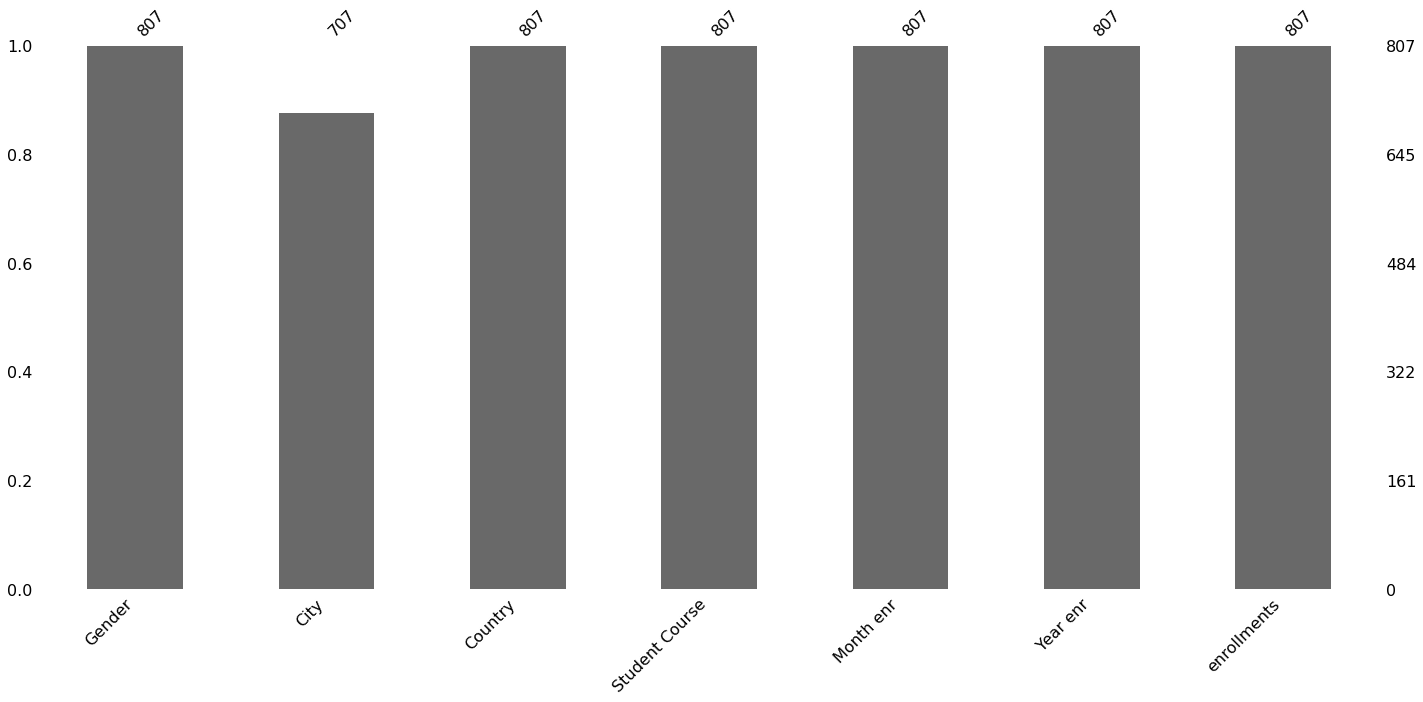

In [5]:
#visualizing missing data
import missingno as msno
msno.bar(df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

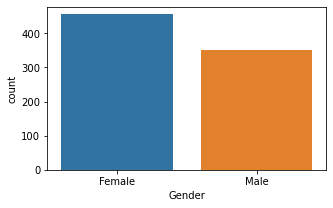

In [6]:
#plotting a gender countplot
plt.figure(figsize=(5,3))
sns.countplot(x='Gender',data=df)

Feature selection

In [7]:
#droping irrelevant columns
df.drop(['Gender','City', 'Country', 'Student Course'],axis=1,inplace=True)
df.head()

,Month enr,Year enr,enrollments
0,Aug,2019,1
1,Aug,2019,1
2,Aug,2019,1
3,Aug,2019,1
4,Aug,2019,1


In [8]:
#making a copy of df so as to use the copy instead of the original 
df1=df.copy()
df1.head()

,Month enr,Year enr,enrollments
0,Aug,2019,1
1,Aug,2019,1
2,Aug,2019,1
3,Aug,2019,1
4,Aug,2019,1


In [9]:
#grouping by year and month to get the number of enrollments per month
df2=df1.groupby(['Year enr','Month enr'],as_index=False)\
.agg({'enrollments':'count'})
df2

,Year enr,Month enr,enrollments
0,2019,Aug,68
1,2019,Dec,16
2,2019,Nov,23
3,2019,Oct,73
4,2019,Sep,197
5,2020,Feb,126
6,2020,Jan,251
7,2020,Mar,53


In [10]:
#making a copy of df2
df3=df2.copy()
df3

,Year enr,Month enr,enrollments
0,2019,Aug,68
1,2019,Dec,16
2,2019,Nov,23
3,2019,Oct,73
4,2019,Sep,197
5,2020,Feb,126
6,2020,Jan,251
7,2020,Mar,53


In [11]:
#dropping rows with year 2020 to remain with year 2019
df3.drop(index=[5,6,7],inplace=True)
df3

,Year enr,Month enr,enrollments
0,2019,Aug,68
1,2019,Dec,16
2,2019,Nov,23
3,2019,Oct,73
4,2019,Sep,197


In [12]:
#making another copy of df2 so as to use it to come up with a dataset with only year 2020
df4=df2.copy()
df4

,Year enr,Month enr,enrollments
0,2019,Aug,68
1,2019,Dec,16
2,2019,Nov,23
3,2019,Oct,73
4,2019,Sep,197
5,2020,Feb,126
6,2020,Jan,251
7,2020,Mar,53


In [13]:
#dropping rows with year 2019 to remain with year 2020
df4.drop(index=[0,1,2,3,4],inplace=True)
df4

,Year enr,Month enr,enrollments
5,2020,Feb,126
6,2020,Jan,251
7,2020,Mar,53


In [15]:
#loading another dataset with year 2018 data
df5=pd.read_csv(r'C:\Users\Raph\ADS notes\projects\year 2018.csv')
df5

,Year enr1,Month enr1,enrollments1
0,2018,Jan,240
1,2018,Feb,138
2,2018,Mar,63
3,2018,Apr,76
4,2018,May,195
5,2018,Jun,76
6,2018,Jul,92
7,2018,Aug,51
8,2018,Sep,198
9,2018,Oct,69


In [16]:
#making a copy of df5
df6=df5.copy()
df6


,Year enr1,Month enr1,enrollments1
0,2018,Jan,240
1,2018,Feb,138
2,2018,Mar,63
3,2018,Apr,76
4,2018,May,195
5,2018,Jun,76
6,2018,Jul,92
7,2018,Aug,51
8,2018,Sep,198
9,2018,Oct,69


In [17]:
#concating df3 and df6 to have one dataset with year 2019 and year 2018
df7=pd.concat([df3,df6],axis=1)
df7

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2019.0,Aug,68.0,2018,Jan,240
1,2019.0,Dec,16.0,2018,Feb,138
2,2019.0,Nov,23.0,2018,Mar,63
3,2019.0,Oct,73.0,2018,Apr,76
4,2019.0,Sep,197.0,2018,May,195
5,NaN,NaN,NaN,2018,Jun,76
6,NaN,NaN,NaN,2018,Jul,92
7,NaN,NaN,NaN,2018,Aug,51
8,NaN,NaN,NaN,2018,Sep,198
9,NaN,NaN,NaN,2018,Oct,69


In [18]:
#filling the missing year value="2019" in column "year enr"
df7['Year enr'].fillna(value=2019.0,inplace=True)
df7

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2019.0,Aug,68.0,2018,Jan,240
1,2019.0,Dec,16.0,2018,Feb,138
2,2019.0,Nov,23.0,2018,Mar,63
3,2019.0,Oct,73.0,2018,Apr,76
4,2019.0,Sep,197.0,2018,May,195
5,2019.0,NaN,NaN,2018,Jun,76
6,2019.0,NaN,NaN,2018,Jul,92
7,2019.0,NaN,NaN,2018,Aug,51
8,2019.0,NaN,NaN,2018,Sep,198
9,2019.0,NaN,NaN,2018,Oct,69


In [19]:
#filling missing months in column "month enr" using indexing 
df7['Month enr'].fillna(value= ({5: 'Jan', 6: 'Feb',7: 'Mar',8: 'Apr',9:'May',10: 'Jun',11: 'Jul'}) ,inplace=True)
df7

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2019.0,Aug,68.0,2018,Jan,240
1,2019.0,Dec,16.0,2018,Feb,138
2,2019.0,Nov,23.0,2018,Mar,63
3,2019.0,Oct,73.0,2018,Apr,76
4,2019.0,Sep,197.0,2018,May,195
5,2019.0,Jan,NaN,2018,Jun,76
6,2019.0,Feb,NaN,2018,Jul,92
7,2019.0,Mar,NaN,2018,Aug,51
8,2019.0,Apr,NaN,2018,Sep,198
9,2019.0,May,NaN,2018,Oct,69


In [20]:
#importing month libraries 
from sorted_months_weekdays import*
from sort_dataframeby_monthorweek import*

In [21]:
#sorting column "Month enr " for the months to run from Jan to Dec
df7=Sort_Dataframeby_Month(df7,monthcolumnname='Month enr')
df7

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2019.0,Jan,NaN,2018,Jun,76
1,2019.0,Feb,NaN,2018,Jul,92
2,2019.0,Mar,NaN,2018,Aug,51
3,2019.0,Apr,NaN,2018,Sep,198
4,2019.0,May,NaN,2018,Oct,69
5,2019.0,Jun,NaN,2018,Nov,25
6,2019.0,Jul,NaN,2018,Dec,21
7,2019.0,Aug,68.0,2018,Jan,240
8,2019.0,Sep,197.0,2018,May,195
9,2019.0,Oct,73.0,2018,Apr,76


In [22]:
#filling missing values in column "enrollments" using mean
df7=df7.fillna(df7.mean())
df7

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2019.0,Jan,75.4,2018,Jun,76
1,2019.0,Feb,75.4,2018,Jul,92
2,2019.0,Mar,75.4,2018,Aug,51
3,2019.0,Apr,75.4,2018,Sep,198
4,2019.0,May,75.4,2018,Oct,69
5,2019.0,Jun,75.4,2018,Nov,25
6,2019.0,Jul,75.4,2018,Dec,21
7,2019.0,Aug,68.0,2018,Jan,240
8,2019.0,Sep,197.0,2018,May,195
9,2019.0,Oct,73.0,2018,Apr,76


In [23]:
df7.drop(['Year enr1','Month enr1','enrollments1'], axis=1, inplace=True)
df7

,Year enr,Month enr,enrollments
0,2019.0,Jan,75.4
1,2019.0,Feb,75.4
2,2019.0,Mar,75.4
3,2019.0,Apr,75.4
4,2019.0,May,75.4
5,2019.0,Jun,75.4
6,2019.0,Jul,75.4
7,2019.0,Aug,68.0
8,2019.0,Sep,197.0
9,2019.0,Oct,73.0


In [24]:
#concating df4 and df6 to have one dataset with year 2020 and year 2018 
df8=pd.concat([df4,df6],axis=1)
df8

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,NaN,NaN,NaN,2018,Jan,240
1,NaN,NaN,NaN,2018,Feb,138
2,NaN,NaN,NaN,2018,Mar,63
3,NaN,NaN,NaN,2018,Apr,76
4,NaN,NaN,NaN,2018,May,195
5,2020.0,Feb,126.0,2018,Jun,76
6,2020.0,Jan,251.0,2018,Jul,92
7,2020.0,Mar,53.0,2018,Aug,51
8,NaN,NaN,NaN,2018,Sep,198
9,NaN,NaN,NaN,2018,Oct,69


In [25]:
#filling the missing year value="2020" in column "year enr"
df8['Year enr'].fillna(value=2020.0,inplace=True)
df8

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2020.0,NaN,NaN,2018,Jan,240
1,2020.0,NaN,NaN,2018,Feb,138
2,2020.0,NaN,NaN,2018,Mar,63
3,2020.0,NaN,NaN,2018,Apr,76
4,2020.0,NaN,NaN,2018,May,195
5,2020.0,Feb,126.0,2018,Jun,76
6,2020.0,Jan,251.0,2018,Jul,92
7,2020.0,Mar,53.0,2018,Aug,51
8,2020.0,NaN,NaN,2018,Sep,198
9,2020.0,NaN,NaN,2018,Oct,69


In [26]:
#filling missing months in column "month enr" using indexing 
df8['Month enr'].fillna(value= ({0: 'Apr', 1: 'May',2: 'Jun',3: 'Jul',4:'Aug',8: 'Sep',9: 'Oct',10:'Nov',11:'Dec'}) ,inplace=True)
df8

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2020.0,Apr,NaN,2018,Jan,240
1,2020.0,May,NaN,2018,Feb,138
2,2020.0,Jun,NaN,2018,Mar,63
3,2020.0,Jul,NaN,2018,Apr,76
4,2020.0,Aug,NaN,2018,May,195
5,2020.0,Feb,126.0,2018,Jun,76
6,2020.0,Jan,251.0,2018,Jul,92
7,2020.0,Mar,53.0,2018,Aug,51
8,2020.0,Sep,NaN,2018,Sep,198
9,2020.0,Oct,NaN,2018,Oct,69


In [27]:
#sorting column "Month enr " for the months to run from Jan to Dec
df8=Sort_Dataframeby_Month(df8,monthcolumnname='Month enr')
df8

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2020.0,Jan,251.0,2018,Jul,92
1,2020.0,Feb,126.0,2018,Jun,76
2,2020.0,Mar,53.0,2018,Aug,51
3,2020.0,Apr,NaN,2018,Jan,240
4,2020.0,May,NaN,2018,Feb,138
5,2020.0,Jun,NaN,2018,Mar,63
6,2020.0,Jul,NaN,2018,Apr,76
7,2020.0,Aug,NaN,2018,May,195
8,2020.0,Sep,NaN,2018,Sep,198
9,2020.0,Oct,NaN,2018,Oct,69


In [29]:
#filling df8 null values using mean
df8=df8.fillna(df8.mean())
df8

,Year enr,Month enr,enrollments,Year enr1,Month enr1,enrollments1
0,2020.0,Jan,251.000000,2018,Jul,92
1,2020.0,Feb,126.000000,2018,Jun,76
2,2020.0,Mar,53.000000,2018,Aug,51
3,2020.0,Apr,143.333333,2018,Jan,240
4,2020.0,May,143.333333,2018,Feb,138
5,2020.0,Jun,143.333333,2018,Mar,63
6,2020.0,Jul,143.333333,2018,Apr,76
7,2020.0,Aug,143.333333,2018,May,195
8,2020.0,Sep,143.333333,2018,Sep,198
9,2020.0,Oct,143.333333,2018,Oct,69


In [30]:
#dropping unwanted columns
df8.drop(['Year enr1','Month enr1','enrollments1'], axis=1, inplace=True)
df8

,Year enr,Month enr,enrollments
0,2020.0,Jan,251.000000
1,2020.0,Feb,126.000000
2,2020.0,Mar,53.000000
3,2020.0,Apr,143.333333
4,2020.0,May,143.333333
5,2020.0,Jun,143.333333
6,2020.0,Jul,143.333333
7,2020.0,Aug,143.333333
8,2020.0,Sep,143.333333
9,2020.0,Oct,143.333333


In [31]:
#renaming the colums
df9=df5.rename(columns={'Year enr1':'Year enr','Month enr1':'Month enr','enrollments1':'enrollments'},inplace=False)
df9

,Year enr,Month enr,enrollments
0,2018,Jan,240
1,2018,Feb,138
2,2018,Mar,63
3,2018,Apr,76
4,2018,May,195
5,2018,Jun,76
6,2018,Jul,92
7,2018,Aug,51
8,2018,Sep,198
9,2018,Oct,69


In [32]:
#getting the final dataset
final_df=pd.concat([df7,df8,df9])
final_df

,Year enr,Month enr,enrollments
0,2019.0,Jan,75.400000
1,2019.0,Feb,75.400000
2,2019.0,Mar,75.400000
3,2019.0,Apr,75.400000
4,2019.0,May,75.400000
5,2019.0,Jun,75.400000
6,2019.0,Jul,75.400000
7,2019.0,Aug,68.000000
8,2019.0,Sep,197.000000
9,2019.0,Oct,73.000000


<AxesSubplot:xlabel='Month enr', ylabel='enrollments'>

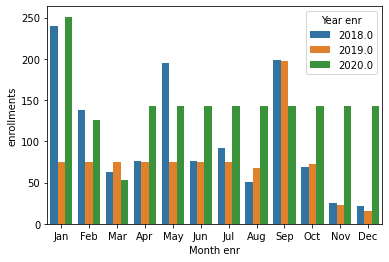

In [37]:
#visualizing enrollment numbers across the different months in the 3 years
sns.barplot(x='Month enr',y='enrollments',hue='Year enr',data=final_df)

Model building

In [38]:
#importing the ml libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

In [39]:
#Dummy encoding the remaining categorical object columns
dataset=pd.get_dummies(final_df, columns = ['Month enr'],dtype = 'int8')
dataset

,Year enr,enrollments,Month enr_Apr,Month enr_Aug,Month enr_Dec,Month enr_Feb,Month enr_Jan,Month enr_Jul,Month enr_Jun,Month enr_Mar,Month enr_May,Month enr_Nov,Month enr_Oct,Month enr_Sep
0,2019.0,75.400000,0,0,0,0,1,0,0,0,0,0,0,0
1,2019.0,75.400000,0,0,0,1,0,0,0,0,0,0,0,0
2,2019.0,75.400000,0,0,0,0,0,0,0,1,0,0,0,0
3,2019.0,75.400000,1,0,0,0,0,0,0,0,0,0,0,0
4,2019.0,75.400000,0,0,0,0,0,0,0,0,1,0,0,0
5,2019.0,75.400000,0,0,0,0,0,0,1,0,0,0,0,0
6,2019.0,75.400000,0,0,0,0,0,1,0,0,0,0,0,0
7,2019.0,68.000000,0,1,0,0,0,0,0,0,0,0,0,0
8,2019.0,197.000000,0,0,0,0,0,0,0,0,0,0,0,1
9,2019.0,73.000000,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:
#identifying the columns in the new dataset
dataset.columns

Index(['Year enr', 'enrollments', 'Month enr_Apr', 'Month enr_Aug',
       'Month enr_Dec', 'Month enr_Feb', 'Month enr_Jan', 'Month enr_Jul',
       'Month enr_Jun', 'Month enr_Mar', 'Month enr_May', 'Month enr_Nov',
       'Month enr_Oct', 'Month enr_Sep'],
      dtype='object')

In [41]:
#Setting up the features and labels
x= dataset[['Year enr','Month enr_Apr', 'Month enr_Aug',
       'Month enr_Dec', 'Month enr_Feb', 'Month enr_Jan', 'Month enr_Jul',
       'Month enr_Jun', 'Month enr_Mar', 'Month enr_May', 'Month enr_Nov',
       'Month enr_Oct', 'Month enr_Sep' ]].values
y = dataset['enrollments'].values

Data preprocessing

In [42]:
#transforming x values 
scaler = StandardScaler()
x = scaler.fit_transform(x).reshape(-1,1)
y=scaler.fit_transform(x).reshape(-1,1)

In [43]:
#Spliting features and labels for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [44]:
#calling our mls and fitting our x,y values for training and predictions
regr = LinearRegression(n_jobs=-1)

regr.fit(x_train, y_train)

regression_line = regr.predict(x_train)
y_predict = regr.predict(x_test)

In [45]:
r2_score(regression_line, y_train)

1.0

In [46]:
r2_score(y_predict, y_test)


1.0